In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')

In [2]:
rank = pd.read_csv("../data/curated/top100.csv")
rank.head()

,rank,merchant_abn,name,tags,revenue_level,take_rate,pred_total_num_consumer,pred_total_num_transaction,pred_total_revenue,scaled_pred_total_num_consumer,scaled_pred_total_num_transaction,scaled_pred_total_revenue,score,segment
0,1.0,86578477987,Leo In Consulting,watch,a,6.43,18401.787239,186995.508934,4.057260e+07,81.958135,93.860171,94.491595,90.542129,personal & household good retail
1,2.0,45629217853,Lacus Consulting,gift,a,6.98,20229.355422,152068.956683,3.901436e+07,90.097783,76.329203,90.862535,86.273110,personal & household good retail
2,3.0,89726005175,Est Nunc Consulting,tent,a,6.01,20470.587646,148275.013700,3.515933e+07,91.172187,74.424879,81.884370,82.432868,recreational good retailing
3,4.0,49891706470,Non Vestibulum Industries,tent,a,5.80,19602.825874,169836.662152,2.952668e+07,87.307337,85.247492,68.766204,79.272930,recreational good retailing
4,5.0,21439773999,Mauris Non Institute,cable,a,6.10,22414.468538,81980.094056,3.698102e+07,99.829870,41.148933,86.126994,76.744439,technical & machinery service


In [3]:
value_count = rank['segment'].value_counts()
value_count

personal & household good retail    44
recreational good retailing         30
technical & machinery service       20
health service                       6
Name: segment, dtype: int64

In [4]:
rank['tags'].value_counts()

tent             14
computer         12
watch             9
digital goods     8
gift              8
florists          5
opticians         5
artist supply     5
motor             5
furniture         5
books             4
garden supply     4
cable             3
music             3
shoe              3
stationery        3
antique           2
hobby             1
health            1
Name: tags, dtype: int64

In [5]:
tag_lst = []
for segments in rank['segment'].unique():
    sub_lst = []
    for tags in rank.loc[rank['segment'] == segments]['tags'].unique():
        tag_lst.append(len(rank.loc[rank['tags'] == tags]))
        sub_lst.append(tags)
    print(segments, ": ", sub_lst)
tag_lst


personal & household good retail :  ['watch', 'gift', 'music', 'florists', 'artist supply', 'furniture', 'antique', 'garden supply', 'shoe']
recreational good retailing :  ['tent', 'digital goods', 'hobby', 'books', 'stationery']
technical & machinery service :  ['cable', 'computer', 'motor']
health service :  ['opticians', 'health']


[9, 8, 3, 5, 5, 5, 2, 4, 3, 14, 8, 1, 4, 3, 3, 12, 5, 5, 1]

In [6]:
cmap1 = plt.colormaps['Blues']
inner_colors1 = cmap1(np.arange(9)*30 + 100)
cmap2 = plt.colormaps['Oranges']
inner_colors2 = cmap2(np.arange(5)*30 + 100)
cmap3 = plt.colormaps['Greens']
inner_colors3 = cmap3(np.arange(3)*30 + 100)
cmap4 = plt.colormaps['Purples']
inner_colors4 = cmap4(np.arange(2)*30 + 100)

inner_colors = np.vstack((inner_colors1, inner_colors2, inner_colors3, inner_colors4))

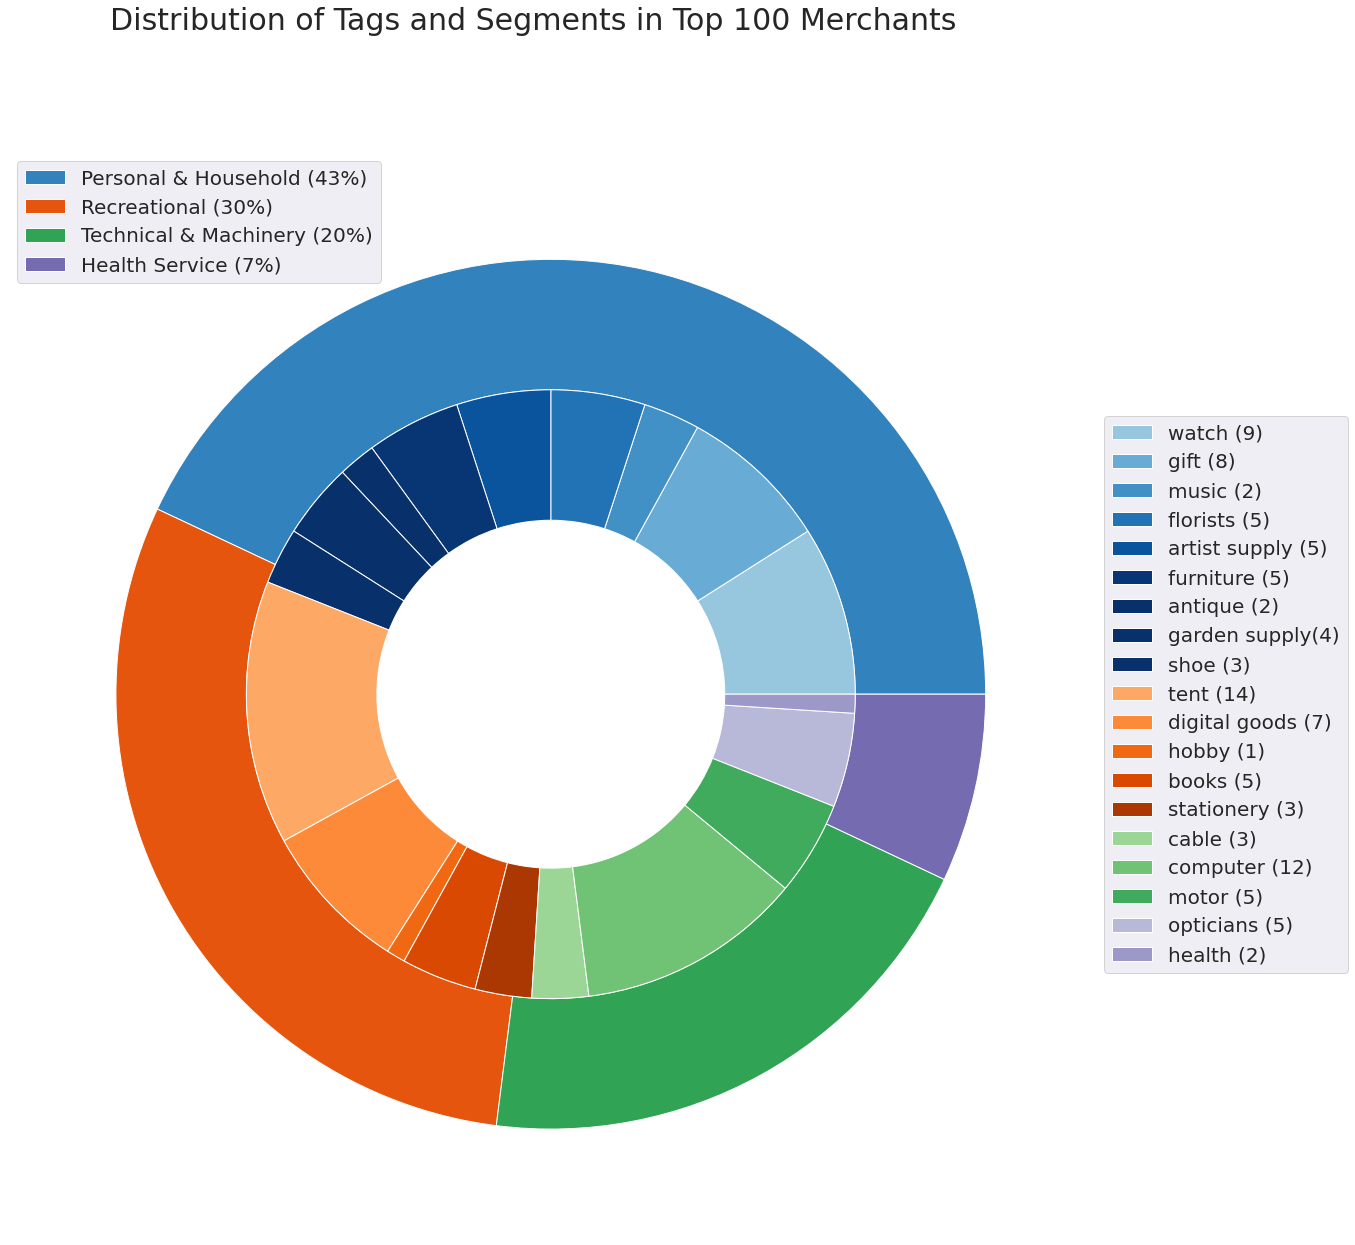

In [7]:
fig, ax = plt.subplots(figsize = (20, 20))
size = 0.3

[9, 8, 2, 5, 5, 5, 2, 4, 3, 14, 7, 1, 5, 3, 3, 12, 5, 5, 2]
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(4)*4)

labels1 = [r'Personal & Household (43%)', r'Recreational (30%)', r'Technical & Machinery (20%)', r'Health Service (7%)']
size1 = [43, 30, 20, 7]
patches1, texts1= ax.pie(size1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
legend1 = plt.legend(patches1, labels1, loc = 'upper left', prop={'size': 20})

labels2 = [r'watch (9)', r'gift (8)', r'music (2)', r'florists (5)', r'artist supply (5)', r'furniture (5)', 
        r'antique (2)', r'garden supply(4)', r'shoe (3)', r'tent (14)', r'digital goods (7)', r'hobby (1)',\
        r'books (5)', r'stationery (3)', r'cable (3)', r'computer (12)', r'motor (5)', r'opticians (5)', r'health (2)']
size2 = tag_lst
patches2, texts2= ax.pie(size2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
plt.legend(patches2, labels2, loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 20})
plt.gca().add_artist(legend1)

ax.set(aspect="equal")
fig.suptitle('Distribution of Tags and Segments in Top 100 Merchants', fontsize=30)
plt.savefig("../plots/Tag and Segments Distribution in TOP100.png", bbox_inches = 'tight')
plt.show()

In [8]:
top_two = rank.loc[(rank['tags'] == 'tent') | (rank['tags'] == 'computer')]

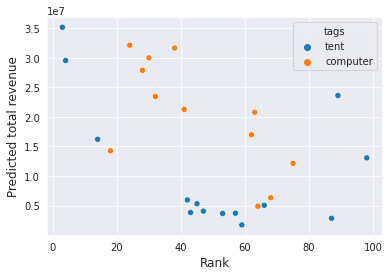

In [9]:
sns.scatterplot(y=top_two['pred_total_revenue'], x=top_two['rank'], hue=top_two['tags'])
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Predicted total revenue", fontsize=12)
plt.show()

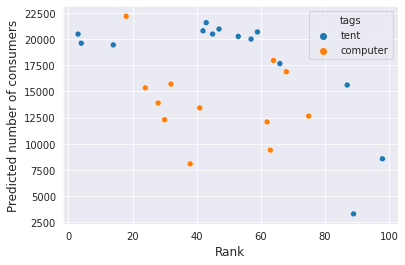

In [10]:
sns.scatterplot(x = 'rank', y = 'pred_total_num_consumer', data = top_two, hue = 'tags')
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Predicted number of consumers", fontsize=12)
plt.show()

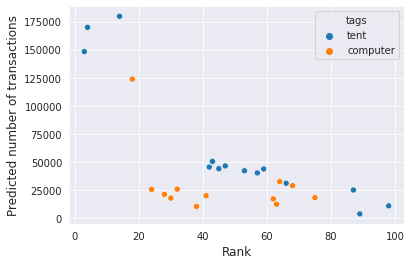

In [11]:
sns.scatterplot(x = 'rank', y = 'pred_total_num_transaction', data = top_two, hue = 'tags')
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Predicted number of transactions", fontsize=12)
plt.show()

In [12]:
recreational = rank.loc[rank['segment'] == 'recreational good retailing']

,rank,merchant_abn,name,tags,revenue_level,take_rate,pred_total_num_consumer,pred_total_num_transaction,pred_total_revenue,scaled_pred_total_num_consumer,scaled_pred_total_num_transaction,scaled_pred_total_revenue,score,segment
2,3.0,89726005175,Est Nunc Consulting,tent,a,6.01,20470.587646,148275.013700,3.515933e+07,91.172187,74.424879,81.884370,82.432868,recreational good retailing
3,4.0,49891706470,Non Vestibulum Industries,tent,a,5.80,19602.825874,169836.662152,2.952668e+07,87.307337,85.247492,68.766204,79.272930,recreational good retailing
11,12.0,72472909171,Nullam Consulting,digital goods,a,6.33,22443.529746,69855.196418,3.057486e+07,99.959304,35.062985,71.207357,68.989629,recreational good retailing
13,14.0,64203420245,Pede Nonummy Corp.,tent,c,2.86,19436.142780,179721.422842,1.620487e+07,86.564962,90.209030,37.740346,68.128336,recreational good retailing
20,21.0,98973094975,Ornare Fusce Inc.,hobby,a,5.98,18796.978265,37224.891842,2.817854e+07,83.718242,18.684592,65.626437,56.971425,recreational good retailing
22,23.0,49505931725,Suspendisse Ac Associates,digital goods,b,4.70,20695.401495,46958.847174,2.286505e+07,92.173466,23.570435,53.251586,56.023804,recreational good retailing
24,25.0,35223308778,Euismod In Corp.,books,b,4.19,17262.928070,30533.984741,2.197498e+07,76.885868,15.326170,51.178656,48.135074,recreational good retailing
41,42.0,57900494384,Porttitor Tellus Corporation,tent,a,6.39,20781.125811,45436.404065,5.939324e+06,92.555266,22.806262,13.832395,40.141416,recreational good retailing
42,43.0,91923722701,Euismod Urna Institute,tent,b,5.05,21558.585643,50439.479078,3.810469e+06,96.017927,25.317496,8.874396,39.950385,recreational good retailing
44,45.0,82065156333,Nascetur Ridiculus PC,tent,a,5.88,20476.775664,44005.779981,5.297105e+06,91.199747,22.088178,12.336699,38.921057,recreational good retailing


In [13]:
mean_total_num_consumer = []
mean_total_num_transaction = []
mean_total_revenue = []
tags = []
for tag in rank['tags'].unique():
    tags.append(tag)
    sub = rank.loc[rank['tags'] == tag]
    mean_total_num_consumer.append(sub['pred_total_num_consumer'].mean())
    mean_total_num_transaction.append(sub['pred_total_num_transaction'].mean())
    mean_total_revenue.append(sub['pred_total_revenue'].mean())


In [19]:
import pandas as pd
from functools import reduce

segment = {
    'furniture': 'personal & household good retail',
    'cable': 'technical & machinery service',
    'watch': 'personal & household good retail',
    'music': 'personal & household good retail',
    'gift': 'personal & household good retail',
    'computer': 'technical & machinery service',
    'equipment': 'technical & machinery service',
    'artist supply': 'personal & household good retail',
    'florists': 'personal & household good retail',
    'motor': 'technical & machinery service',
    'books': 'recreational good retailing',
    'jewelry': 'personal & household good retail',
    'stationery': 'recreational good retailing',
    'tent': 'recreational good retailing',
    'art dealer': 'personal & household good retail',
    'bicycle': 'recreational good retailing',
    'digital goods': 'recreational good retailing',
    'shoe': 'personal & household good retail',
    'opticians': 'health service',
    'antique': 'personal & household good retail',
    'health': 'health service',
    'hobby': 'recreational good retailing',
    'garden supply': 'personal & household good retail',
    'telecom': 'technical & machinery service'
}

def merge_data():
    """
    This function merges the predictions for the three labels with the merchant information
    for the final scoring and ranking. Missing values are filled with 0 in case we do not lose
    any merchants
    Output: The merged dataset
    """
    # read data
    num_consumer = pd.read_csv('../data/curated/pred_total_num_consumer.csv')
    num_transaction = pd.read_csv('../data/curated/pred_total_num_transaction.csv')
    revenue = pd.read_csv('../data/curated/pred_total_revenue.csv')
    merchant_info = pd.read_csv('../data/curated/merchant.csv')

    # merge three data frames based on merchant abn
    data_frames = [merchant_info, num_consumer, num_transaction, revenue]
    df_merged = reduce(lambda left,right: pd.merge(left,right,on=['merchant_abn'], how='outer'), data_frames)

    # impute missing values and negative values with zero
    df_merged = df_merged.fillna(0)
    num = df_merged._get_numeric_data()
    num[num < 0] = 0

    return df_merged

def cal_score_rank(df_merged):
    """
    For each label, we normalise the predictions and sum them up with decided weights. Then we choose
    the top 100 merchants and scale their score into the range of (0, 100)
    Output: Top 100 merchants with their information, label values, scores and ranking
            stored in the directory "../data/curated/top100.csv"
    """
    # min-max normalization
    features = ['pred_total_num_consumer', 'pred_total_num_transaction', 'pred_total_revenue']
    for col in features:
        df_merged[f'scaled_{col}'] = 100 * (df_merged[col] - df_merged[col].min()) / (df_merged[col].max() - df_merged[col].min())

    # calculate ranking score for each merchant
    df_merged['score'] = 0.3*df_merged['scaled_pred_total_num_consumer'] + 0.3*df_merged['scaled_pred_total_num_transaction'] + 0.4*df_merged['scaled_pred_total_revenue']

    df_merged['rank'] = df_merged['score'].rank(ascending=False)
    df_merged = df_merged.set_index('rank').sort_index()

    # split merchants into 4 segments
    df_merged['segment'] = df_merged['tags'].map(segment)

    # find top 100 merchants overall
    return df_merged




In [20]:
full = cal_score_rank(merge_data())
full

,merchant_abn,name,tags,revenue_level,take_rate,pred_total_num_consumer,pred_total_num_transaction,pred_total_revenue,scaled_pred_total_num_consumer,scaled_pred_total_num_transaction,scaled_pred_total_revenue,score,segment
rank,,,,,,,,,,,,,
1.0,86578477987,Leo In Consulting,watch,a,6.43,18401.787239,186995.508934,4.057260e+07,81.958135,93.860171,94.491595,90.542129,personal & household good retail
2.0,45629217853,Lacus Consulting,gift,a,6.98,20229.355422,152068.956683,3.901436e+07,90.097783,76.329203,90.862535,86.273110,personal & household good retail
3.0,89726005175,Est Nunc Consulting,tent,a,6.01,20470.587646,148275.013700,3.515933e+07,91.172187,74.424879,81.884370,82.432868,recreational good retailing
4.0,49891706470,Non Vestibulum Industries,tent,a,5.80,19602.825874,169836.662152,2.952668e+07,87.307337,85.247492,68.766204,79.272930,recreational good retailing
5.0,21439773999,Mauris Non Institute,cable,a,6.10,22414.468538,81980.094056,3.698102e+07,99.829870,41.148933,86.126994,76.744439,technical & machinery service
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997.5,26793253394,In Ltd,jewelry,c,2.36,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,personal & household good retail
3997.5,94009500943,Dapibus Corp.,antique,b,3.53,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,personal & household good retail
3997.5,93915598279,Molestie Pharetra Nibh LLP,antique,c,1.47,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,personal & household good retail


In [21]:
full_count = full[['segment', 'merchant_abn']].groupby("segment").count()
full_count.rename({'merchant_abn': 'full_merchant_count'}, axis=1, inplace=True)
rank_count = rank[['segment', 'merchant_abn']].groupby("segment").count()
rank_count.rename({'merchant_abn': '100_merchant_count'}, axis=1, inplace=True)

In [22]:
rank_proportion = rank_count.merge(full_count, on='segment', how='left')
rank_proportion['proportion'] = rank_proportion['100_merchant_count'] / rank_proportion['full_merchant_count']
rank_proportion

,100_merchant_count,full_merchant_count,proportion
segment,,,
health service,6,315,0.019048
personal & household good retail,44,1744,0.025229
recreational good retailing,30,1010,0.029703
technical & machinery service,20,957,0.020899


In [24]:
full_filtered = full.loc[(full['pred_total_num_transaction'] > 0) & (full['pred_total_num_consumer'] > 0)]
full_filtered

,merchant_abn,name,tags,revenue_level,take_rate,pred_total_num_consumer,pred_total_num_transaction,pred_total_revenue,scaled_pred_total_num_consumer,scaled_pred_total_num_transaction,scaled_pred_total_revenue,score,segment
rank,,,,,,,,,,,,,
1.0,86578477987,Leo In Consulting,watch,a,6.43,18401.787239,186995.508934,4.057260e+07,81.958135,93.860171,94.491595,90.542129,personal & household good retail
2.0,45629217853,Lacus Consulting,gift,a,6.98,20229.355422,152068.956683,3.901436e+07,90.097783,76.329203,90.862535,86.273110,personal & household good retail
3.0,89726005175,Est Nunc Consulting,tent,a,6.01,20470.587646,148275.013700,3.515933e+07,91.172187,74.424879,81.884370,82.432868,recreational good retailing
4.0,49891706470,Non Vestibulum Industries,tent,a,5.80,19602.825874,169836.662152,2.952668e+07,87.307337,85.247492,68.766204,79.272930,recreational good retailing
5.0,21439773999,Mauris Non Institute,cable,a,6.10,22414.468538,81980.094056,3.698102e+07,99.829870,41.148933,86.126994,76.744439,technical & machinery service
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895.0,30900210196,Sem Magna Nec Industries,jewelry,b,4.98,0.737463,0.953812,5.591319e+03,0.003285,0.000479,0.013022,0.006338,personal & household good retail
3896.0,79931898050,Nascetur Ridiculus Company,antique,d,1.12,0.192242,5.108864,5.591319e+03,0.000856,0.002564,0.013022,0.006235,personal & household good retail
3899.0,88040874613,Dapibus Id Ltd,antique,b,3.90,0.008299,4.821633,5.591319e+03,0.000037,0.002420,0.013022,0.005946,personal & household good retail


In [25]:
average_compare = full_filtered[['tags', 'pred_total_num_consumer', 'pred_total_num_transaction', 'pred_total_revenue']].groupby('tags').mean()
average_compare

,pred_total_num_consumer,pred_total_num_transaction,pred_total_revenue
tags,,,
antique,1895.582149,2394.283186,1.390674e+06
art dealer,175.344265,177.817282,4.260346e+05
artist supply,1001.715812,1617.100957,1.733362e+06
bicycle,837.696681,932.327062,9.223249e+05
books,1342.970254,1634.369523,1.763663e+06
cable,2870.166686,3740.043843,1.459937e+06
computer,1620.277842,2259.563531,1.803487e+06
digital goods,3341.184807,4498.608604,1.452119e+06
equipment,254.243672,260.483495,2.472591e+05


In [26]:
average_compare_top = rank[['tags', 'pred_total_num_consumer', 'pred_total_num_transaction', 'pred_total_revenue']].groupby('tags').mean()
average_compare_top.rename({'pred_total_num_consumer': 'pred_total_num_consumer_top', 'pred_total_num_transaction': 'pred_total_num_transaction_top', 'pred_total_revenue': 'pred_total_revenue_top'}, axis=1, inplace=True)
average_compare_top

,pred_total_num_consumer_top,pred_total_num_transaction_top,pred_total_revenue_top
tags,,,
antique,15293.030840,24426.427689,1.461994e+07
artist supply,10406.752513,31566.073666,2.537445e+07
books,14373.295158,23355.913904,1.399659e+07
cable,17304.222652,42560.119863,1.894009e+07
computer,14154.441214,29435.336371,2.014029e+07
digital goods,16619.517461,32629.126441,1.025681e+07
florists,16775.314236,81477.721821,2.302996e+07
furniture,17024.854507,29831.463615,1.525878e+07
garden supply,13337.142756,19772.916621,1.265060e+07


In [27]:
average_compare = average_compare.merge(average_compare_top, on='tags', how='left').dropna()
average_compare

,pred_total_num_consumer,pred_total_num_transaction,pred_total_revenue,pred_total_num_consumer_top,pred_total_num_transaction_top,pred_total_revenue_top
tags,,,,,,
antique,1895.582149,2394.283186,1.390674e+06,15293.030840,24426.427689,1.461994e+07
artist supply,1001.715812,1617.100957,1.733362e+06,10406.752513,31566.073666,2.537445e+07
books,1342.970254,1634.369523,1.763663e+06,14373.295158,23355.913904,1.399659e+07
cable,2870.166686,3740.043843,1.459937e+06,17304.222652,42560.119863,1.894009e+07
computer,1620.277842,2259.563531,1.803487e+06,14154.441214,29435.336371,2.014029e+07
digital goods,3341.184807,4498.608604,1.452119e+06,16619.517461,32629.126441,1.025681e+07
florists,1459.876544,3343.160553,1.729066e+06,16775.314236,81477.721821,2.302996e+07
furniture,1535.529561,2030.766500,1.302894e+06,17024.854507,29831.463615,1.525878e+07
garden supply,1381.804959,1639.630455,1.570329e+06,13337.142756,19772.916621,1.265060e+07


In [29]:
average_compare = full_filtered[['segment', 'pred_total_num_consumer', 'pred_total_num_transaction', 'pred_total_revenue']].groupby('segment').mean()
average_compare_top = rank[['segment', 'pred_total_num_consumer', 'pred_total_num_transaction', 'pred_total_revenue']].groupby('segment').mean()
average_compare_top.rename({'pred_total_num_consumer': 'pred_total_num_consumer_top', 'pred_total_num_transaction': 'pred_total_num_transaction_top', 'pred_total_revenue': 'pred_total_revenue_top'}, axis=1, inplace=True)
average_compare = average_compare.merge(average_compare_top, on='segment', how='left').dropna()
average_compare

,pred_total_num_consumer,pred_total_num_transaction,pred_total_revenue,pred_total_num_consumer_top,pred_total_num_transaction_top,pred_total_revenue_top
segment,,,,,,
health service,1570.550413,2329.069172,1.371194e+06,14869.807282,45919.972502,1.557496e+07
personal & household good retail,1614.779699,2618.153035,1.515846e+06,15422.437462,44711.116311,2.027686e+07
recreational good retailing,1882.460726,2979.343046,1.454808e+06,16106.595548,43487.390678,1.276199e+07
technical & machinery service,1643.642726,2167.916606,1.540343e+06,13734.079147,27690.079358,2.102891e+07


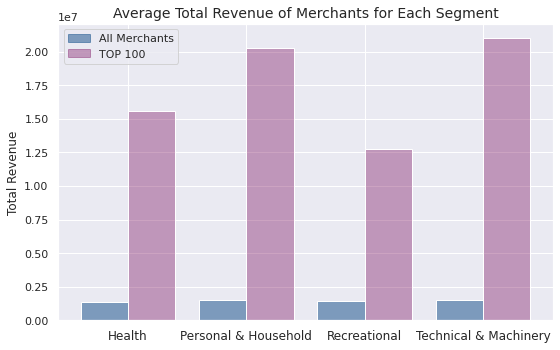

In [32]:
import matplotlib.patches as mpatches
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# set the figure size
plt.figure(figsize=(8, 4.944))

x_axis = np.arange(len(average_compare.index))
bar1 = plt.bar(x_axis -0.2, average_compare['pred_total_revenue'], width=0.4, label = 'All merchants', color=(0.2, 0.4, 0.6, 0.6))
bar2 = plt.bar(x_axis +0.2, average_compare['pred_total_revenue_top'], width=0.4, label = 'TOP 100', color = (0.5, 0.1, 0.4, 0.4))
plt.xticks(x_axis, ['Health', 'Personal & Household', 'Recreational', 'Technical & Machinery'], size = 12)
plt.ylabel("Total Revenue", size = 12)
# add legend
top_bar = mpatches.Patch(color=(0.2, 0.4, 0.6, 0.6), label='All Merchants')
bottom_bar = mpatches.Patch(color=(0.5, 0.1, 0.4, 0.4), label='TOP 100')
plt.legend(handles=[top_bar, bottom_bar])
plt.tight_layout()
plt.title('Average Total Revenue of Merchants for Each Segment', size = 14)
# show the graph
plt.savefig('../plots/Average Total Revenue of Merchants for Each Segment.png')
plt.show()